In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)
df_raw = df.copy()
pd.set_option('display.max_columns', None)

In [3]:
df.tail(12)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34845,Windsor,13 Mary St,4,h,NaN,W,Jellis,24/02/2018,4.6,3181.0,4.0,3.0,2.0,279.0,237.0,2009.0,Port Phillip City Council,-37.85418,144.99697,Southern Metropolitan,4380.0
34846,Wollert,10 Alma Rd,4,h,630000.0,SP,hockingstuart,24/02/2018,25.5,3750.0,4.0,2.0,2.0,388.0,NaN,NaN,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34848,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,24/02/2018,25.5,3750.0,4.0,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,24/02/2018,25.5,3750.0,3.0,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [4]:
# 1.

# count NaNs in the column 'Price'
df['Price'].isna().value_counts()

# drop NaNs in the column 'Price'
df = df.dropna(subset='Price')

# convert 'Price' to integer
df['Price'] = df['Price'].copy().astype(int)

In [5]:
# 2.

# see frequencies of 'Type'
df['Type'].value_counts()

h    18472
u     5909
t     2866
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

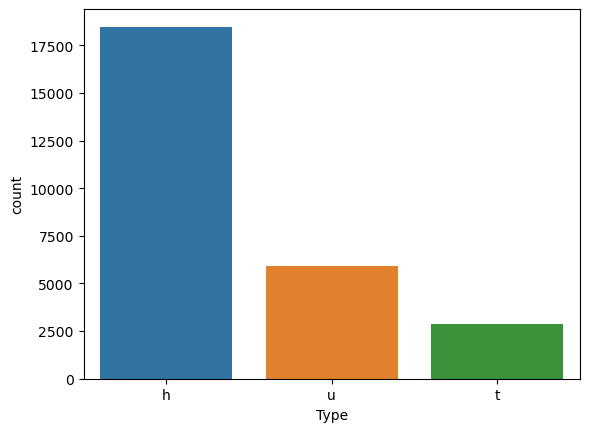

In [6]:
# 3.

# create chart showing the frequencies of 'Type'
sns.countplot(df, x='Type', order = df['Type'].value_counts().index)

<Axes: xlabel='Number of Rooms', ylabel='Median Price'>

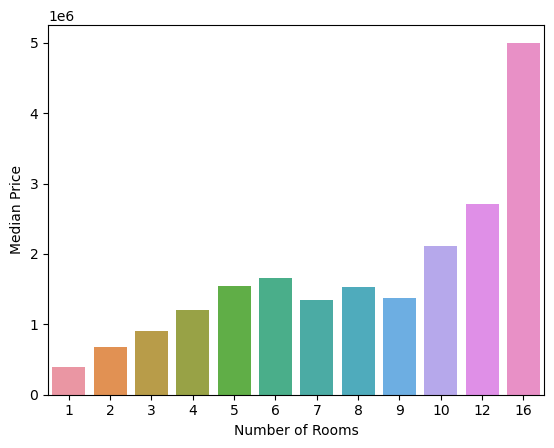

In [7]:
# 4.

# create dataframe storing relation between the number of rooms and median price
df_4 = pd.DataFrame({'Number of Rooms': df.groupby('Rooms')['Price'].median().index, 'Median Price': df.groupby('Rooms')['Price'].median().values})

# create barplot showing relation between the number of rooms and median price
sns.barplot(df_4, x='Number of Rooms', y='Median Price')

In [8]:
# 5.

# calculate Spearman correlation between price and number or rooms
df['Price'].corr(df['Rooms'], method='spearman')

0.5042971590926004

-0.18809341092744206

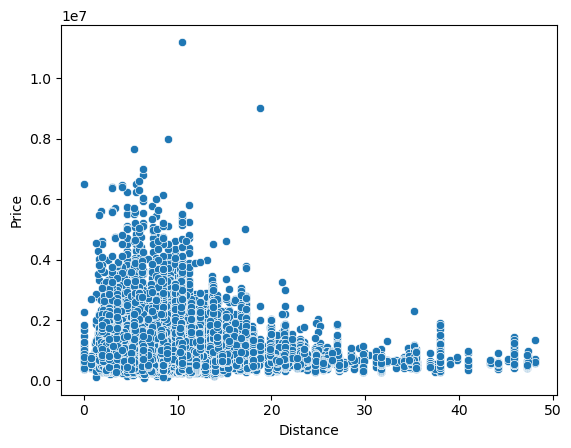

In [9]:
# 6.

# create scatterplot to show relationship between 'Distance' and 'Price'
sns.scatterplot(df, x='Distance', y='Price')

# calculate Spearman correlation
df['Distance'].corr(df['Price'], method='spearman')

0.03274836524947046

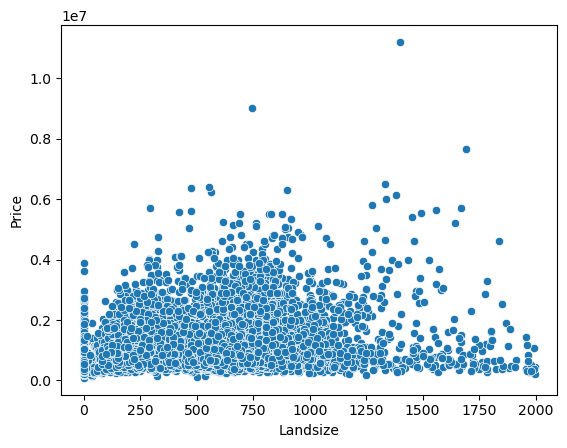

In [10]:
# 7.

# investigate relationship between property price and property size
sns.scatterplot(df.loc[df['Landsize'] < 2000], x='Landsize', y='Price')
df['Landsize'].corr(df['Price'], method='spearman')
df['Landsize'].corr(df['Price'], method='pearson')

<Axes: xlabel='Landsize Category', ylabel='Price'>

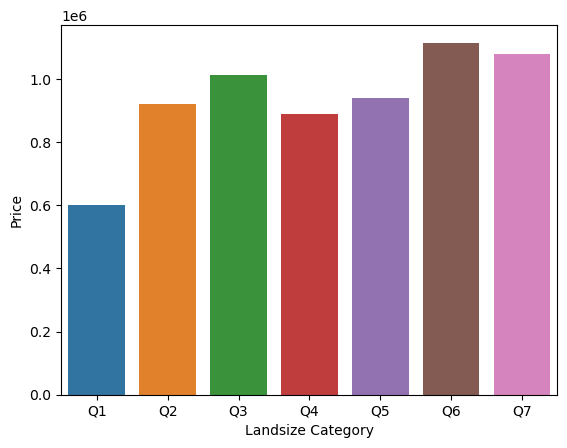

In [11]:
# 8.

# discretize landsize into seven quantiles and create barplot showing the relationship between landsize quantile and price
quantiles = 7
df_8 = pd.DataFrame({'Landsize Category': pd.qcut(df['Landsize'], q=quantiles, labels=[f'Q{x+1}' for x in range(quantiles)]).values, 'Price': df['Price']}).dropna().groupby('Landsize Category').median().reset_index()
sns.barplot(df_8, x='Landsize Category', y='Price')

<Axes: xlabel='Landsize Category', ylabel='Price'>

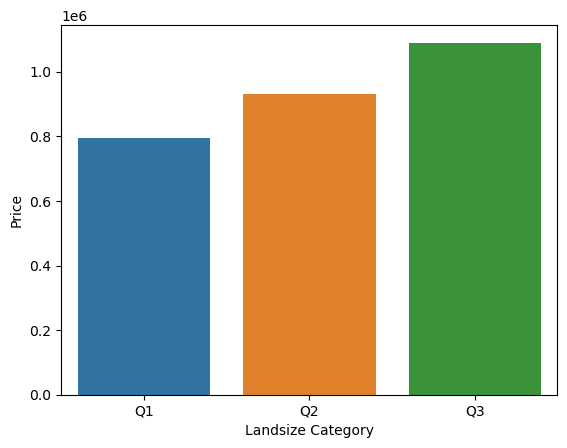

In [12]:
# discretize landsize into three quantiles and create barplot showing the relationship between landsize quantile and price
quantiles = 3
df_8 = pd.DataFrame({'Landsize Category': pd.qcut(df['Landsize'], q=quantiles, labels=[f'Q{x+1}' for x in range(quantiles)]).values, 'Price': df['Price']}).dropna().groupby('Landsize Category').median().reset_index()
sns.barplot(df_8, x='Landsize Category', y='Price')

0.0471244540683378

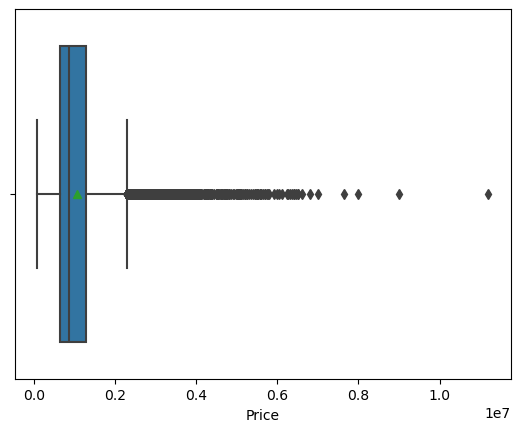

In [13]:
# 9.

# create boxplot to explore outliers in the price column
sns.boxplot(df, x='Price', showmeans=True)

# calculate thresolds for outliers following Tukey's method:
Q1 = df['Price'].describe()['25%']
Q3 = df['Price'].describe()['75%']
IQR = Q3 - Q1
outlier_threshold_bottom = Q1 - 1.5*IQR
outlier_threshold_top = Q3 + 1.5*IQR

# create new dataframe without outliers
df_9 = df.loc[(df['Price'] > outlier_threshold_bottom) & (df['Price'] < outlier_threshold_top)]

# calculate percentage of outliers
(27247-25963)/27247

Skew: 2.5889693410528594
Kurtosis: 13.097200515556374


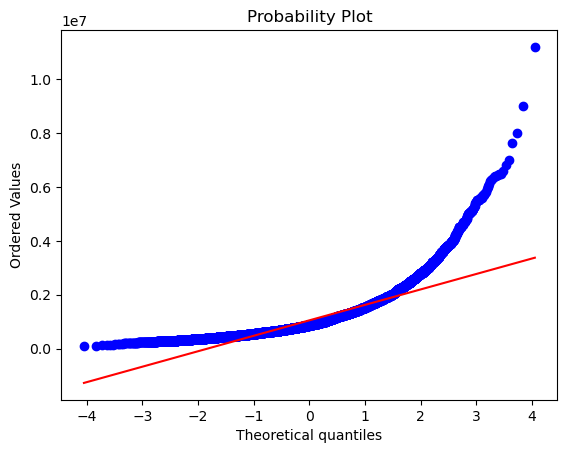

In [14]:
# 10.

# Q-Q plot for 'Price' column
from scipy import stats
import matplotlib.pyplot as plt
fig = stats.probplot(df["Price"], plot=plt)

# calculate skewness and kurtosis
print(f"Skew: {df['Price'].skew()}")
print(f"Kurtosis: {df['Price'].kurt()}")

In [15]:
# 11.

# perform Kolmogorov-Smirnov-Test to check normality
ks_test_statistic, ks_p_value = stats.kstest(df['Price'], 'norm')
print(f'KS Test Statistic: {ks_test_statistic}')
print(f'KS Test P-Value: {ks_p_value}')

KS Test Statistic: 1.0
KS Test P-Value: 0.0


<Axes: xlabel='Price', ylabel='Type'>

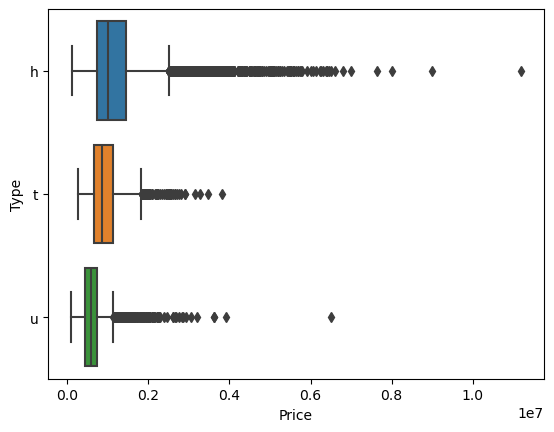

In [16]:
# 11.

# create boxplots showing the price distribution for different types
sns.boxplot(df, y='Type', x='Price')

In [17]:
# 12.

# investigate median price by region
df.groupby('Regionname')['Price'].median().sort_values()

Regionname
Western Victoria               412125.0
Northern Victoria              565000.0
Eastern Victoria               679000.0
Western Metropolitan           750000.0
Northern Metropolitan          752500.0
South-Eastern Metropolitan     811250.0
Eastern Metropolitan          1015000.0
Southern Metropolitan         1250000.0
Name: Price, dtype: float64

In [18]:
# 13.

# investigate correlation between price and region

# create price categories by quantiles
quantiles = 5
df_12 = pd.DataFrame({'Price Category': pd.qcut(df['Price'], q=quantiles, labels=[f'C{x+1}' for x in range(quantiles)]).values, 'Region': df['Regionname']})

# chi-square test for two columns
from scipy.stats import chi2_contingency
df_crosstab = pd.crosstab(df_12['Region'], df_12['Price Category'])
statistic, p_value, dof, expected_freq = chi2_contingency(df_crosstab)
print(f'p-Value for Chi-square test: {p_value}')

# Cramers V test
from scipy.stats.contingency import association
cramers_V = association(df_crosstab, method="cramer")
print(f'Cramer\'s V: {cramers_V}')

# degrees of freedom is min(5,7)-1 = 4

p-Value for Chi-square test: 0.0
Cramer's V: 0.2292786672838293


In [19]:
# 15.

# investigate price change between earliest and latest year
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
median_price_earliest = df['Price'].loc[df['Date'].dt.year == df['Date'].dt.year.min()].median()
median_price_latest = df['Price'].loc[df['Date'].dt.year == df['Date'].dt.year.max()].median()

(median_price_latest - median_price_earliest) / median_price_earliest

-0.05480225988700565

In [20]:
# 16.

# investigate number of sales per month
df['Date'].dt.month.value_counts()

11    3408
9     3219
10    3118
5     2620
6     2425
3     2362
7     2359
8     2324
2     2067
12    1490
4     1206
1      649
Name: Date, dtype: int64